In [ ]:
# Paul-Jason Mello
# Professor Shim
# CMPE 257
# March 3rd, 2022

# Classification Algorithms: Logistic Regression and Support Vector Machine

## 1 Explain what is classification and how it is different from regression

In [1]:
# The main difference between classificaiton and regression is in their ability to predict data. They are 
# both examples of supervised learning.
# 
# Classification regards fitting data into predetermined nominal data. In this way the latent space of 
# predictions is well defined and structured. Such that each label being predicted can have a probability 
# associated with the models expected confidence of proper classification. 
# 
# Regression on the other hand is used to predict continous data. In this regard regression is capable
# of being accurate by directly predicting where some data point should lie given a set of training data.
# 
# One reason they are different is because regression is used on continous data and classificaiton is used
# on nominal data. Another reason they are different lies in the way we measure accuracy. With regression 
# we measure based on variation from the actual predicted, while accuracy of classification can be identified
# by the improper labelling of data with a confusion matrix.

## 2 Explain what is Logistic regression, its working and how it is different from linear regression

In [2]:
# Logistic regression is a multinomial regression which can also be applied to binary regression.
# In essence logistic regresion attempts to predict the most likely outcome by asserting constant
# binary regression on multiple variables. This means that when looking at a problem space where the 
# outcomes may be A, B, C, or D we group all excess variables into a single domain such as A and not A, 
# where not A consists of B, C, and D. Then we repeat this with B and not B, and so on. Another way of 
# interpreting this is that logistic regression is equivalent to a single layer neural network.
# 
# Logistic regression is different from linear regression in that linear regression attempts to reduce
# variation by finding the best fit line for some continuous data such that and point can be sampled and
# predicted at any location. Logistic regression is better understood in a latent space as it can 
# occupy higher demensions through degrees of similarity. This can create areas of variable "A", "B", and 
# so on just as we understand borders between countries. So while a linear method can plot continous data
# on a graph, a logistic method can identify what region some input will output to.

## 3 Explain what is Linear SVM and its working

In [3]:
# A linear SVM is a linear support vector machine. It is called this because of its special use of support
# vectors. Essentially, we see that linearly seperable data is used to develop a region of uncertainty called
# a margin that runs parallel to the linearly seperating line. The line is determined by finding the best
# location to split the data in half. Once this is found the closest support vectors, points closest to the 
# best fit line, on either side are determined. These create the boundaries of uncertainty and produce a 
# "margin" that is equidistant on both sides. We then aim to maximize the margin as best we can to ensure the
# best classification then add additional uncertainty measurements. (1/2 ||w||^2). One method that makes
# SVMs so quick and appealing are kernel functions such as linear, polynomial, and radial basis. These
# help transform the data into higher dimensions which counter-intuitively makes the data simpler to
# approximate as the hyperplanes is created without increasing complexity.

## 4 What do you mean by kernel functions?

In [4]:
# Kernel functions are in essence a way to help deterimine the classifications of a non-linear function.
# There are many versions of kernal functions such as polynomial and radial basis which can help solve
# non-linear functions using a linear function. However, choosing the correct kernal fucntion is often 
# difficult given the breadth and complexity of the underliying assumptions. A kernel function like that of
# a sigmoid function can help "curve" the data such that we pass a threshold of likeliness for proper 
# classification in something like an SVM. This is done because, unlike linear regression, we want to 
# associate a predicted value to be closer to a nominal data point/region based on its predicted outcome. 
# By incorporating a dynamic slope we add additional accuracy through, what I see as, a best guess heuristic. 

## 5 Discuss how SVM makes use of kernel functions

In [5]:
# In essence SVM makes use of kernel functions by substituting the dot product with a similar approximation
# in the kernel function. This can be done increadibly quickly as we can significantly reduce the computation
# of any given task. The use of kernel functions also helps to prevent overfitting by implicitly training for
# approximated predictions. This can help automatically develop a boundry space in a higher dimension without 
# ever explicitly mapping it out. In many ways it simply abstracts and generalizes the expected function.

## 6 Discuss the following terms: Accuracy, Precision, Recall, F1 score, Specificity, Sensitivity, AUROC, PRAUC

In [6]:
# Accuracy
# 
# Accuracy = correct predictions / total number of predicted data
# This can help directly determine how many accurate predictions were made by the model. This is a common
# and effective measurement for prediction.

In [7]:
# Precision
# 
# Precision = True Positive / True Positive + False Positive
# Unlike accuracy, precision incorporates the potential for a false positive in the data. This can be a better
# measurment than accuracy as it ensures the model is not predicting false positives often.

In [8]:
# Recall
# 
# Recall = True Positive / True Positive + False Negative
# Recall is essentially like precisions except that it incorporates false negatives. This can be a better
# solution if one needs to ensure the model is not predicting false negatives often.

In [9]:
# F1 Score
# 
# F1 Score = (2 x ((precision x recall)/(precision + recall)))
# This metric can be used for measuring the accuracy of a classification system. For example we may find that
# our model predicts one class of data more accurately than another. F1 scores account for this by 
# incorporating the relative accuracy for each class.

In [10]:
# Specificity
# 
# Specificity = True Negatives / (True Negatives + False Positives)
# This can help determine the actual number of negatives in the models prediction.

In [11]:
# Sensitivity
# 
# Sensitivity = True Positives / (True Positives + Fakse Negatives)
# This metric can help determine the actual number of positives in the models prediction.

In [12]:
# AUROC
# 
# The AUROC is a way for graphing the true positive rate compared to the false positive rate. This can help
# determine the classifiers ability to distinguish between different classes. The graph is a diminishing
# function function that displays specificity vs sensitiveity.

In [13]:
# PRAUC
# 
# PRAUC is in essence the inverse of AUROC where we measure the predicted true positive values and the true
# positive rate. 

In [14]:
# It is important to note that throughout each of these specific measurements we are aiming to calculate
# some particular metric to produce better results. One common example is we want to prevent
# missclassification in situations such as identifying cancers. We want to make sure our models are not
# improperly labelling those without cancer as patients with cancer. We can use precision in this case
# to ensure we are not predicting false positives.
# 
# This is to say that each metric has a time and a place for its use.

## 7 perform classification on zoo dataset from kaggle using logistic regression after performing appropriate data pre processing and hyper parameter tuning and evaluate using the technique you feel is fit for this task and give your comments.

In [15]:
import pandas as pd
import sklearn as sk

from sklearn import metrics

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder

In [16]:
# download 
zoo = pd.read_csv("zoo.csv")
zoo.drop(['animal_name'], axis = 'columns', inplace = True)
zoo

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [17]:
zoo.isnull().sum()

hair          0
feathers      0
eggs          0
milk          0
airborne      0
aquatic       0
predator      0
toothed       0
backbone      0
breathes      0
venomous      0
fins          0
legs          0
tail          0
domestic      0
catsize       0
class_type    0
dtype: int64

In [18]:
zooClass = pd.read_csv("class.csv")
zooClass

,Class_Number,Number_Of_Animal_Species_In_Class,Class_Type,Animal_Names
0,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
1,2,20,Bird,"chicken, crow, dove, duck, flamingo, gull, haw..."
2,3,5,Reptile,"pitviper, seasnake, slowworm, tortoise, tuatara"
3,4,13,Fish,"bass, carp, catfish, chub, dogfish, haddock, h..."
4,5,4,Amphibian,"frog, frog, newt, toad"
5,6,8,Bug,"flea, gnat, honeybee, housefly, ladybird, moth..."
6,7,10,Invertebrate,"clam, crab, crayfish, lobster, octopus, scorpi..."


In [19]:
# Increasing total iterations to deal with poor covergence.
# Additionally toying with the learning rate through iteration.
LR = LogisticRegression(max_iter = 10000,  tol = 0.001) 

In [20]:
folded = KFold(n_splits = 10, random_state = 101, shuffle = True)

In [21]:
x_train, x_test, y_train, y_test = train_test_split(zoo, zoo.class_type, test_size = .30)

In [22]:
LR.fit(x_train, y_train)

LogisticRegression(max_iter=10000, tol=0.001)

In [23]:
y_pred = LR.predict(x_test)

In [24]:
mat = metrics.confusion_matrix(y_test, y_pred)
mat

array([[12,  0,  0,  0,  0,  0,  0],
       [ 0,  5,  0,  0,  0,  0,  0],
       [ 0,  0,  1,  1,  0,  0,  0],
       [ 0,  0,  0,  4,  0,  0,  0],
       [ 0,  0,  1,  0,  2,  0,  0],
       [ 0,  0,  0,  0,  0,  4,  0],
       [ 0,  0,  0,  0,  0,  0,  1]], dtype=int64)

In [25]:
print("Total Accuracy: ", metrics.accuracy_score(y_test, y_pred))

Total Accuracy:  0.9354838709677419


In [26]:
scores = cross_val_score(LR, x_train, y_train, scoring = 'accuracy', cv = folded, n_jobs = -1)
print("Total Accuracy: " + str(sum(scores)/10)) #average accuracy from 10 folded splits

Total Accuracy: 0.9142857142857143


## 8 perform classification on MNIST dataset using Linear SVM and then using Kernels and compare the methods

In [27]:
import matplotlib.pyplot as plt
from sklearn import svm

# I could not download the test or train csv that was provided. I was informed that it continued MNIST data
# So I downloaded sklearns mnist data instead. to perform the linear SVM.

from sklearn.datasets import load_digits

Dimensions of the MNIST data:(1797, 64)


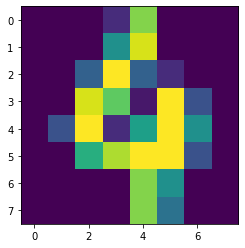

In [28]:
mnist = load_digits()
plt.imshow(mnist.images[100])
print("Dimensions of the MNIST data:" + str(mnist.data.shape))

In [29]:
pd.DataFrame(mnist.data).head(15)

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
5,0.0,0.0,12.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,0.0,0.0,0.0,9.0,16.0,16.0,10.0,0.0,0.0
6,0.0,0.0,0.0,12.0,13.0,0.0,0.0,0.0,0.0,0.0,...,8.0,0.0,0.0,0.0,1.0,9.0,15.0,11.0,3.0,0.0
7,0.0,0.0,7.0,8.0,13.0,16.0,15.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,13.0,5.0,0.0,0.0,0.0,0.0
8,0.0,0.0,9.0,14.0,8.0,1.0,0.0,0.0,0.0,0.0,...,8.0,0.0,0.0,0.0,11.0,16.0,15.0,11.0,1.0,0.0
9,0.0,0.0,11.0,12.0,0.0,0.0,0.0,0.0,0.0,2.0,...,4.0,0.0,0.0,0.0,9.0,12.0,13.0,3.0,0.0,0.0


In [30]:
pd.DataFrame(mnist.target).head(15)

,0
0,0
1,1
2,2
3,3
4,4
5,5
6,6
7,7
8,8
9,9


In [31]:
x_train, x_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size = .30)

In [32]:
# Linear Kernel

LSVM = svm.SVC(kernel = 'linear')

In [33]:
LSVM.fit(x_train, y_train)
print(LSVM.score(x_test, y_test))

0.9722222222222222


In [34]:
# Polynomial Kernel

SVM = svm.SVC(kernel = 'poly', degree = 3)

In [35]:
SVM.fit(x_train, y_train)
print(SVM.score(x_test, y_test))

0.9796296296296296


In [36]:
# Polynomial Kernel

SVM = svm.SVC(kernel = 'poly', degree = 5)

In [37]:
SVM.fit(x_train, y_train)
print(SVM.score(x_test, y_test))

0.9777777777777777


In [38]:
# Sigmoid Kernel

SVM = svm.SVC(kernel = 'sigmoid')

In [39]:
SVM.fit(x_train, y_train)
print(SVM.score(x_test, y_test))

0.9111111111111111


In [40]:
# RBF Kernel

SVM = svm.SVC(kernel = 'rbf')

In [41]:
SVM.fit(x_train, y_train)
print(SVM.score(x_test, y_test))

0.9814814814814815


In [42]:
# We can see that different kernel types result in significantly different accuracies when using the same data
# It appears that the RBF kernel works the best while sigmoid performs the worst, in the context of this data.
# Additionally, we can see that when increasing the degree attached to the polynomial kernel we can actually 
# lose accuracy. This makes sense as a simplier polynomial is likely to capture generalized data better.

# Another important aspect is that our specific data set produced these results using different kernels.
# Using another data set may result in finding that the kernels perform differently. 